**torch.utils.data.DataLoader方法**

作用

对数据进行batch的划分，且输入进函数的数据一定得是可迭代的

分解

```python
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
    drop_last=False,            # 最后一批数据小于batch_size时也不剔除
)
```

[【Pytorch基础】torch.utils.data.DataLoader方法的使用_import torch.utils.data as data_一穷二白到年薪百万的博客-CSDN博客](https://blog.csdn.net/zfhsfdhdfajhsr/article/details/116836851)



### [iter与numerate区别](https://blog.csdn.net/qq_43391414/article/details/118575559)

# 常见激活函数总结

In [17]:
## Sigmoid激活函数
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def gradient(f, x):
    lr = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size-1):
        t_val = x[idx]
        x[idx] = float(t_val) + lr
        f1 = f(x[idx])     # f(x+h)
        x[idx] = t_val - lr
        f2 = f(x[idx])     # f(x-h)
        grad[idx] = (f1 - f2) / (2*lr)
        x[idx] = t_val    # 还原值
    return grad

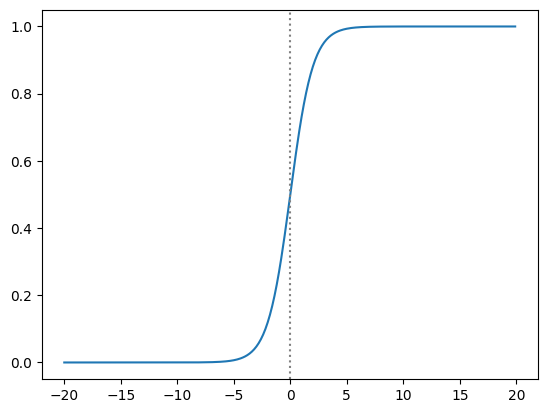

In [40]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))    
x = np.array(range(-200,200))/10
plt.plot(x,sigmoid(x))
plt.axvline(x = 0, ls = ':', c = 'gray')
plt.show()

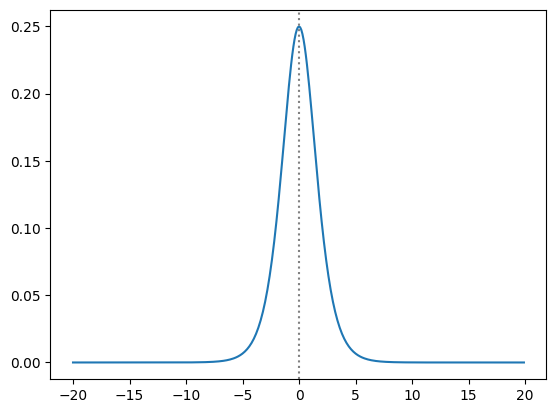

In [43]:
plt.plot(x,gradient(sigmoid,x))
# print(gradient(sigmoid,x))
plt.axvline(x = 0, ls = ':', c = 'gray')
plt.show()

* 梯度消失
* 不以零为中心
* 计算成本高昂

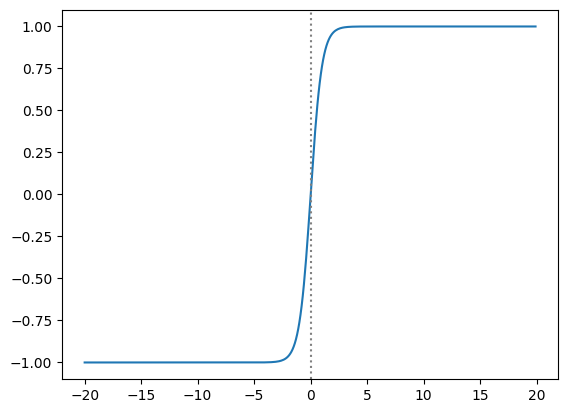

In [44]:
## Tanh激活函数
def Tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x,Tanh(x))
plt.axvline(x = 0, ls = ':', c = 'gray')
plt.show()

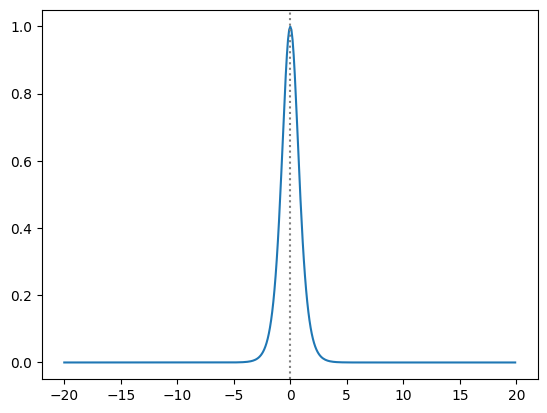

In [45]:
plt.plot(x,gradient(Tanh,x))
plt.axvline(x = 0, ls = ':', c = 'gray')
plt.show()

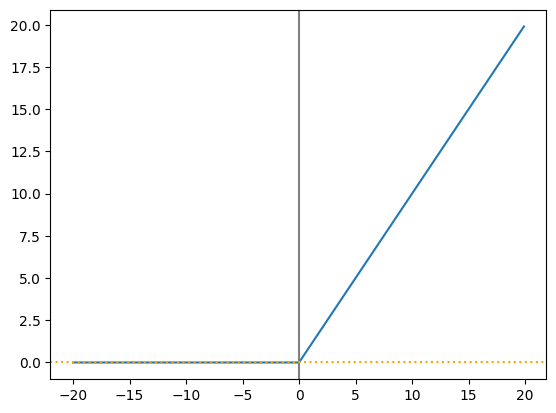

In [52]:
# ReLU函数
def ReLU(x):
    ans = np.zeros_like(x)
    for idx in range(x.size):
        ans[idx] = x[idx] if x[idx]>0 else 0
    return  ans
plt.plot(x,ReLU(x))
plt.axvline(x = 0, ls = '-', c = 'gray')
plt.axhline(y = 0, ls = ':', c = 'orange')
plt.show()

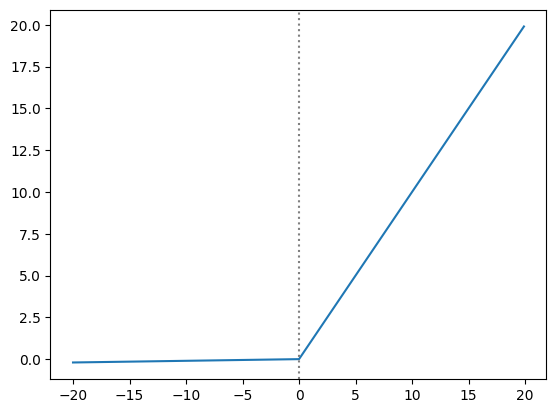

In [53]:
# LeakyReLU函数
def LeakyReLU(x):
    ans = np.zeros_like(x)
    gamma = 0.01
    for idx in range(x.size):
        ans[idx] = x[idx] if x[idx]>0 else gamma*x[idx]
    return  ans
plt.plot(x,LeakyReLU(x))
plt.axvline(x = 0, ls = ':', c = 'gray')
plt.show()

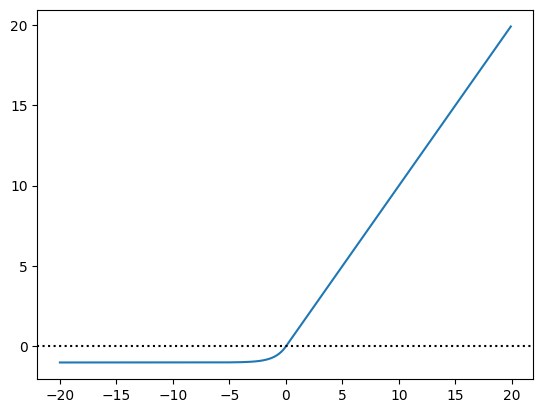

In [54]:
# ELU函数
import math
def ELU(x):
    ans = np.zeros_like(x)
    gamma = 1
    for idx in range(x.size):
        ans[idx] = x[idx] if x[idx]>0 else gamma*(math.exp(x[idx])-1)
    return  ans
plt.plot(x,ELU(x))
plt.axhline(y = 0, ls = ":", c = 'black')
plt.show()

sum =  1.0


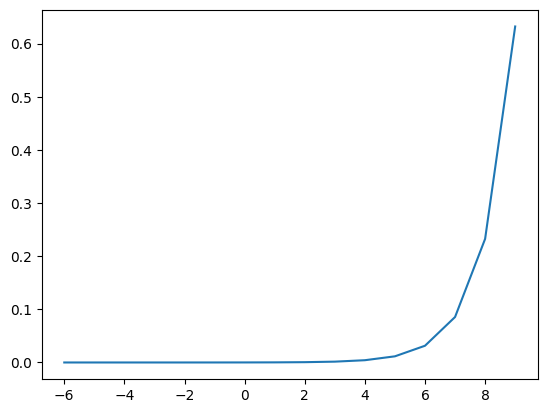

In [55]:
## Softmax函数
def Softmax(x):
    y = np.exp(x)
    sum = np.sum(y)
    y = y/sum
    return y

arr = np.array(range(-6,10))
plt.plot(arr, Softmax(arr))
print('sum = ',np.sum(Softmax(arr)))

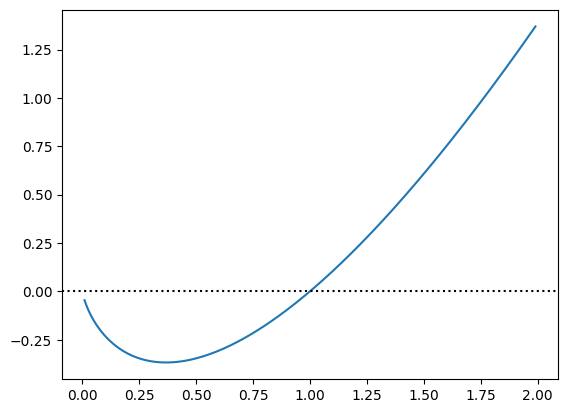

In [56]:
## H(x) 熵
def H(x):
    return x*np.log(x)

arr = np.array(range(1,200))/100
plt.plot(arr, H(arr))
plt.axhline(y = 0, ls = ":", c = 'black')
plt.show()

# 常见损失函数
[TensorFlow2损失函数大全_tf.keras.losses.mse-CSDN博客](https://blog.csdn.net/Jwenxue/article/details/107131733)

[机器学习--- 交叉熵损失(CrossEntropy Loss)--(附代码) - CSDN App](http://t.csdnimg.cn/JnZZT)

In [ ]:
##  均方误差损失函数（MSE）
import numpy as np
import torch

In [105]:
x=[2.,5.]
y=[0.,1.]
# pytorch版本
y1=torch.tensor(y)
print(y1)
y2=torch.tensor(x)
print(y2)
mse_fc = torch.nn.MSELoss(reduction = 'none')
mse_loss = mse_fc(y1,y2)
print(mse_loss)
mse_fc = torch.nn.MSELoss(reduction = 'sum')
mse_loss = mse_fc(y1,y2)
print(mse_loss)
mse_fc = torch.nn.MSELoss(reduction = 'mean') # 默认
mse_loss = mse_fc(y1,y2)
print(mse_loss)

tensor([0., 1.])
tensor([2., 5.])
tensor([ 4., 16.])
tensor(20.)
tensor(10.)


In [ ]:
## KL散度函数（相对熵），常用于度量两个概率分布之间的距离
### 生成分布
import numpy as np
import scipy.stats

In [107]:
# 随机生成两个离散型分布
x = [np.random.randint(1, 11) for i in range(10)]
print(x)
print(np.sum(x))
px = x / np.sum(x)
print(px)
y = [np.random.randint(1, 11) for i in range(10)]
print(y)
print(np.sum(y))
py = y / np.sum(y)
print(py)

[8, 10, 5, 4, 2, 9, 10, 3, 3, 2]
56
[0.14285714 0.17857143 0.08928571 0.07142857 0.03571429 0.16071429
 0.17857143 0.05357143 0.05357143 0.03571429]
[3, 9, 1, 1, 1, 7, 3, 2, 7, 6]
40
[0.075 0.225 0.025 0.025 0.025 0.175 0.075 0.05  0.175 0.15 ]


In [108]:
KL = scipy.stats.entropy(px, py)
print(KL)

0.2824158993083621


In [109]:
### 直接使用公式
KL = 0.0
for i in range(px.size):
    KL += px[i] * np.log(px[i] / py[i])
# print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))
 
print(KL)

0.2824158993083621


In [ ]:
## 交叉熵损失，用于评估当前训练得到的概率分布与真实分布的差异情况

In [2]:
import torch

In [5]:
input = torch.tensor([
    [-1.0606,  1.5613,  1.2007, -0.2481],
    [-1.9652, -0.4367, -0.0645, -0.5104],
    [ 0.1011, -0.5904,  0.0243,  0.1002]
])
target = torch.tensor([0,2,1])
Cross_loss = torch.nn.CrossEntropyLoss()
print(Cross_loss(input,target))

tensor(2.0373)


## Softmax函数
### https://zhuanlan.zhihu.com/p/31231210

In [5]:
### Softmax函数 
import torch

data = torch.tensor([[1.0,2.0,3.0],[4.0,6.0,8.0]])
print(data)
print(data.shape)
print(data.type())
 
prob = torch.nn.functional.softmax(data,dim=1) 
# dim = 0,在列上进行Softmax;dim=1,在行上进行Softmax
print(prob)
print(prob.shape)
print(prob.type())

tensor([[1., 2., 3.],
        [4., 6., 8.]])
torch.Size([2, 3])
torch.FloatTensor
tensor([[0.0900, 0.2447, 0.6652],
        [0.0159, 0.1173, 0.8668]])
torch.Size([2, 3])
torch.FloatTensor


In [8]:
import numpy as np

data = np.array([2.0,1.0,0.1])
print(data)
print(data.shape)
print(np.exp(data)/np.sum(np.exp(data)))  ### Softmax表达式

[2.  1.  0.1]
(3,)
[0.65900114 0.24243297 0.09856589]


In [62]:
data = torch.rand(3,2)
print(data)
print(torch.nn.functional.softmax(data, dim = 1))
data = torch.randn(3,2)
print(data)
print(torch.nn.functional.softmax(data, dim = 0))
print(torch.nn.functional.softmax(data, dim = -1))

tensor([[0.0820, 0.0383],
        [0.8673, 0.3411],
        [0.4962, 0.9291]])
tensor([[0.5109, 0.4891],
        [0.6286, 0.3714],
        [0.3934, 0.6066]])
tensor([[ 0.8282,  0.1122],
        [ 0.5239,  0.1516],
        [ 1.3331, -0.4057]])
tensor([[0.2946, 0.3794],
        [0.2173, 0.3946],
        [0.4881, 0.2260]])
tensor([[0.6717, 0.3283],
        [0.5920, 0.4080],
        [0.8505, 0.1495]])


In [20]:
## KL散度
### p(x)log(p(x)/q(x))
import torch
def DKL(p, q):
    return torch.sum(p * (p.log() - q.log()),dim = -1)
P = torch.tensor([0.4, 0.6])
Q = torch.tensor([0.3, 0.7])
KL = DKL(P, Q)
print(KL)

tensor(0.0226)


In [22]:
import math
0.4 * (math.log(0.4)-math.log(0.3)) + 0.6 * (math.log(0.6)-math.log(0.7))

0.0225824210843575

In [42]:
## BCELoss损失函数 二分类交叉熵损失函数
### LOSS=−(ylog(p(x)+(1−y)log(1−p(x)),s.t.其中p(x)是模型输出，y是真实标签
import torch
torch.manual_seed(0)
source = torch.rand(1,3)
print('source=',source)
# acfun = torch.nn.Sigmoid()
# source = acfun(source)
# print('acfun(source)=',acfun(source))
target = torch.tensor([[1,1,1]], dtype = torch.float32)
print('target=',target)
loss = torch.nn.BCELoss()
print('loss=',loss(source, target))
print(-(np.log(0.4963)+np.log(0.7682)+np.log(0.0885))/3)

source= tensor([[0.4963, 0.7682, 0.0885]])
target= tensor([[1., 1., 1.]])
loss= tensor(1.1298)
1.1296775288091092


In [14]:
## linear
### Y(m*n) = X(m*i)*W(i*n)+b
from torch import nn
import torch

model = nn.Linear(2, 1) # 输入特征数为2，输出特征数为1


input = torch.Tensor([1, 2]) # 给一个样本，该样本有2个特征（这两个特征的值分别为1和2）
output = model(input)
print(output)
# 查看模型参数
for param in model.parameters():
    print(param)

tensor([-0.8755], grad_fn=<ViewBackward0>)
Parameter containing:
tensor([[-0.5204, -0.2723]], requires_grad=True)
Parameter containing:
tensor([0.1896], requires_grad=True)


In [18]:
1* (-0.5841) + 2* (0.5365) + 0.5656

1.0545

## 常见的折线图，直方图

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

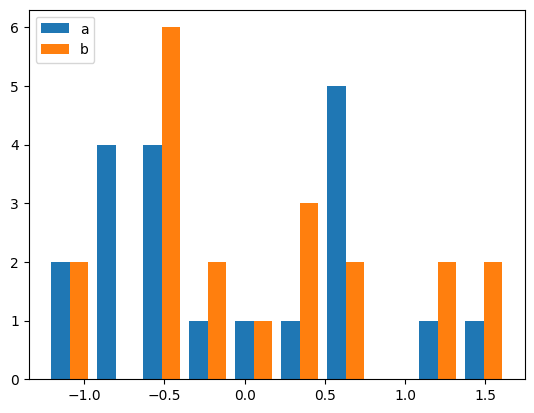

In [26]:
### numpy绘制直方图，折线图
data1 = np.random.randn(20)
data2 = np.random.randn(20)
plt.hist([data1,data2], bins = 10, label = ['a','b'])
plt.legend(loc='upper left')
plt.show()

(6, 20)


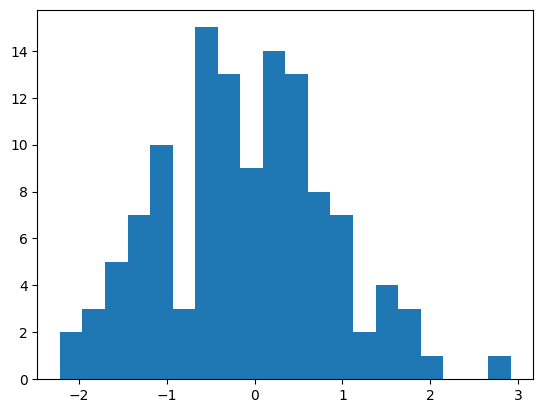

In [10]:
data = np.random.randn(6, 20)
print(data.shape)
data = data.reshape(-1)
plt.hist(data, bins = 20)
plt.show()

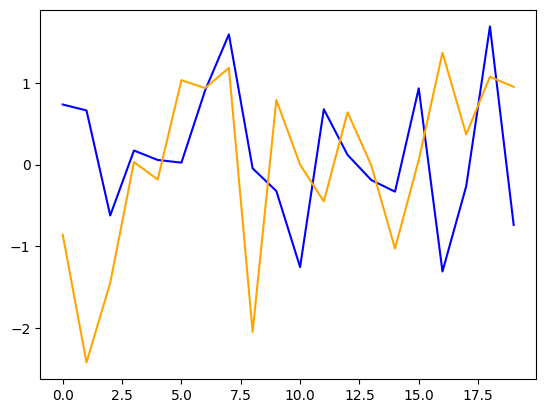

In [12]:
plt.plot(data, c = 'blue')
data = np.random.randn(20)
plt.plot(data, c = 'orange')
plt.show()

In [13]:
import torch

torch.Size([6, 20])


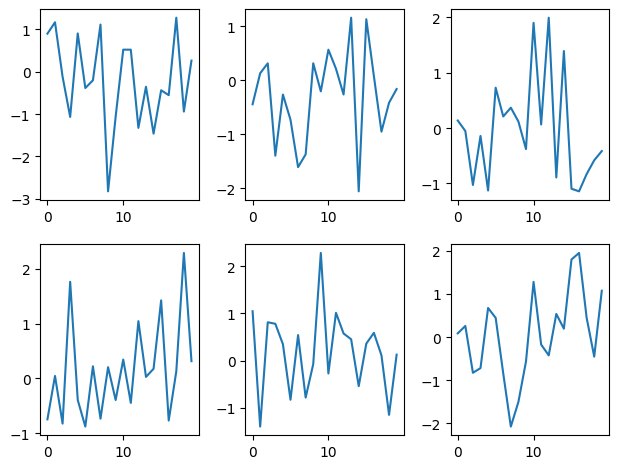

In [14]:
data = torch.randn(6, 20)
print(data.size())
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.plot(data[i])
plt.show()

torch.Size([6, 20])


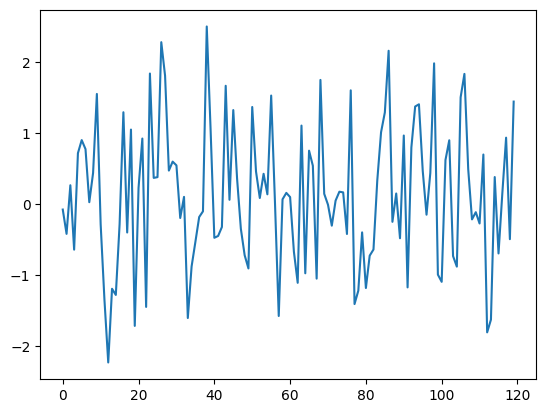

In [15]:
data = torch.randn(6, 20)
print(data.shape)
plt.plot(data.view(-1))

In [1]:
import torch

In [7]:
m = torch.nn.LeakyReLU(0.1) # 构建LeakyReLU函数
input = torch.randn(2) # 输入
output = m(input) # 对输入应用LeakyReLU函数

print(input)
print(output)

tensor([-0.8003,  0.7343])
tensor([-0.0800,  0.7343])


In [16]:
import math

-(math.log(1-0.4897)+math.log(1-0.4892)+math.log(1-0.4911)+math.log(1-0.4903)+math.log(1-0.4907))/5

0.6737376795702067

In [14]:
math.log(0.9)

-0.10536051565782628